# Assignment 1 – Polynomial Regression using ``torch.nn.Module``

- Please create a copy of this notebook onto your own Drive before working on it: `File-->Save a copy in Drive`
- Please submit your ipynb file named with your initials, e.g. `KJH-Assignment1.ipynb` (or a URL link to it) with **the CODE cells output visible** to support your answers and **TEXTUAL answers given as comments** in the code cells.
- Marks will be deducted for missing or partial code cell output where applicable.
- Deadline for submission is **9:00am, Saturday, March 25th.**

## Neural Network Model for Polynomial Regression
Your task is to build **TWO different neural network models** for the function $y = x^2 + 5x$

Requirements:
- You MUST use `torch.nn.Module` to define your neural network classes.
- A random seed is provided to help with code reproducibility so the code will always produce the same result each time you run it.
- The training data should have **10 input values, $x$, and the correct corresponding output values, $y$,** for the function $y = x^2 + 5x$ 
- Each NN may have **maximum TWO hidden layers**.
- You may use a **maximum of 500 neuron units in each hidden layer**.
- You may train over a **maximum of 1000 epochs**.
- Use suitable activation functions that have been covered in class. 
  - Note: Activation function should be used in every layer and the output layer depending on the type of output.
- You MUST use the **Adam optimiser,** available as **`torch.optim.Adam()`** and the **mean squared error (MSE) loss function**.
- **IMPORTANT:** **Your best 2 models should have a loss lower than 0.01** at the end of training.
- If the loss value is the same, you can fill it out regardless of the rank.
- Please write down **the top 2 models** with the best performance in terms of **lowest loss** from your experiment, including **the number of layers, hidden sizes, learning rate, epochs, and the final loss after running all epochs.**
- Print the loss at every 50th epoch. 
- Test the model on $x=10$.
- **Save your training loss** at every iteration.

Note:
- If your model does not achieve a loss of less than 0.01, you will still be awarded marks for `Q7 – Q10` as long as you can explain your answers accordingly.
- For `Q7 – Q12`, please respond with the cases where the loss is the lowest.

In [70]:
import torch
import torch.nn as nn

# 1. Define training data for a the mathematical formula y = x^2 + 5x (3)
x = torch.tensor([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]], dtype = torch.float32)
y = torch.tensor([[6],[14],[24],[36],[50],[66],[84],[104],[126],[150]], dtype = torch.float32)

# top 1

In [71]:
# Top 1 Accuracy Model (the model that has the lowest loss)
torch.manual_seed(40) # This is for reproducibility. You need NOT adjust this.

# 2. Define NN class 1 (10)
class sNN(nn.Module) :
  def __init__(self, hidden_size) :
    super().__init__()
    self.linear1 = nn.Linear(1, hidden_size)
    self.activation = nn.LeakyReLU()
    self.linear2 = nn.Linear(hidden_size, int(hidden_size*0.6))
    self.linear3 = nn.Linear(int(hidden_size*0.6), 1)

  def forward(self, x) :
    out = self.linear1(x)
    out = self.activation(out)
    out = self.linear2(out)
    out = self.activation(out)
    out = self.linear3(out)
    return out

# 3. Create an instance of NN model and define the hidden_size (2)
hidden_size = 500
model = sNN(hidden_size)

# 4. Loss and Optimiser (2)
learning_rate = 0.01
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr = learning_rate)

# 5. Training loop
num_epochs = 800
losses1 = []
for epoch in range(num_epochs):
  # 5.1 Forward pass (2)
  y_pred = model(x)
  loss = loss_fn(y_pred, y)

  # 5.2 Backward pass (3)
  opt.zero_grad()
  loss.backward()
  opt.step()

  # 5.3 Print loss every 50th epoch (1)
  if (epoch + 1) % 50 == 0 :
    print(f'Epoch {epoch+1}/{num_epochs}, Loss={loss.item():.6f}')
  # 5.4 Save training loss at every epoch (2)
  losses1.append(loss.item())

Epoch 50/800, Loss=16.270557
Epoch 100/800, Loss=1.116403
Epoch 150/800, Loss=0.226010
Epoch 200/800, Loss=0.080125
Epoch 250/800, Loss=0.045309
Epoch 300/800, Loss=0.023855
Epoch 350/800, Loss=0.015307
Epoch 400/800, Loss=0.005134
Epoch 450/800, Loss=0.001993
Epoch 500/800, Loss=0.060794
Epoch 550/800, Loss=0.002127
Epoch 600/800, Loss=0.000375
Epoch 650/800, Loss=0.000103
Epoch 700/800, Loss=0.000026
Epoch 750/800, Loss=0.000006
Epoch 800/800, Loss=0.000001


# Top 2

In [72]:
# Top 2 Accuracy Model (the model that has the second lowest loss)
torch.manual_seed(40) # This is for reproducibility. You need NOT adjust this.

# 2. Define NN class 2
class sNN(nn.Module) :
  def __init__(self, hidden_size) :
    super().__init__()
    self.linear1 = nn.Linear(1, hidden_size)
    self.activation = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, hidden_size)
    self.linear3 = nn.Linear(hidden_size, 1)


  def forward(self, x) :
    out = self.linear1(x)
    out = self.activation(out)
    out = self.linear2(out)
    out = self.activation(out)
    out = self.linear3(out)
    return out

# 3. Create an instance of NN model and define the hidden_size 
hidden_size = 500
model2 = sNN(hidden_size)

# 4. Loss and Optimiser 
learning_rate = 0.01
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model2.parameters(), lr = learning_rate)

# 5. Training loop
num_epochs = 650
losses2 = []
for epoch in range(num_epochs):
  # 5.1 Forward pass 
  y_pred = model2(x)
  loss = loss_fn(y_pred, y)

  # 5.2 Backward pass
  opt.zero_grad()
  loss.backward()
  opt.step()

  # 5.3 Print loss every 50th epoch
  if  (epoch + 1) % 50 == 0 : 
    print(f'Epoch {epoch+1}/{num_epochs}, Loss={loss.item():.6f}')
  # 5.4 Save training loss at every epoch 
  losses2.append(loss.item())

Epoch 50/650, Loss=30.886368
Epoch 100/650, Loss=1.656727
Epoch 150/650, Loss=0.222815
Epoch 200/650, Loss=0.076058
Epoch 250/650, Loss=0.040642
Epoch 300/650, Loss=0.025861
Epoch 350/650, Loss=0.011869
Epoch 400/650, Loss=0.003619
Epoch 450/650, Loss=0.001267
Epoch 500/650, Loss=0.000421
Epoch 550/650, Loss=0.000125
Epoch 600/650, Loss=0.000035
Epoch 650/650, Loss=0.000019


In [73]:
# Q6. Please write down the top 2 models with the best performance in terms of lowest loss from your experiment. (3)
# Including the number of layers, hidden sizes, learning rate, epochs, and the final loss after running all epochs.
# Top 1
# number of layers: 1 input layer, 2 hidden layer, and 1 output layer
# number of hidden sizes: 500 (first hidden layer) / 300 (second hidden layer)
# learning rate: 0.01
# epochs: 800
# final loss: 0.000001
# activation func: LeakyReLU

# Top 2:
# number of layers:  1 input layer, 2 hidden layer, and 1 output layer
# number of hidden sizes: 500
# learning rate: 0.01
# epochs: 650
# final loss: 0.000019
# activation func: ReLU


For Q7-Q12, please respond using the best model (the model with the lowest loss).

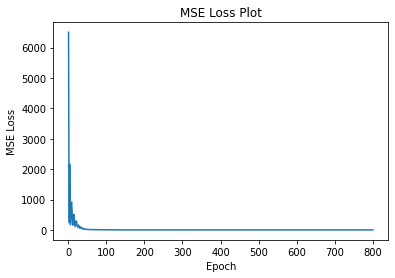

In [74]:
# Q7. Visualize (3)
# Plot the landscape of your training loss (MSE loss) saved for every epoch.
# y-axis would mean MSE loss and x-axis would mean the epoch of your training.
# Hint: you should plot (1,first MSE loss), ... ,(last epoch number,last MSE loss)
import numpy as np
import matplotlib.pyplot as plt
w_range = np.linspace(1, 800, 800)
plt.title("MSE Loss Plot")
plt.plot(w_range,losses1)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()

In [75]:
# Q8. Prediction (2)
# Let's use the model on a new number x, defined as a tensor
test_num = 10
test = torch.tensor([test_num], dtype=torch.float32)
# Get the model's prediction for this new x
print(f'Predicted value : {model(test).item():.4f}')

Predicted value : 149.9976


In [76]:
# Make sure the output of your code cells support your answers below:

# Q9. Describe how the loss changed over time during training. (2)
# Loss value decreased dramatically at first, but became decreased slower and slower, and sometimes it increases again. 

# Q10. Is the prediction for x=10 close enough to the ideal value of 150? 
# Why do you think the prediction is or isn't close enough to the ideal value? (2)
# Model showed prediction '149.9976' and it's quite similar with 150. It's similar because it trained with number input between 1~10
# and correct label output. It trained quite well that data, so prediction is close enough 150.

# Q11. What are the predictions for x=20 and x=100? Based on these predictions, 
# comment on whether the model has captured the relationship between the training inputs and outputs. (2)
# Prediction for x=20 was 381.4797 while expecting 500, and prediction for x=100 was 2095.8186 while expecting 10500.
# As input value x goes far from trained value 1~10, differences between prediction value and actual value become bigger and bigger.

# Q12. Apart from tweaking the number of epochs and the number of neuron units in the hidden layer, think
# of AT LEAST ONE more thing you would do to try to improve the model. You do NOT have to follow the 
# requirements nor to implement anything. (1)
# 1. Increase size of Training Data
# 2. use train/test data set similar with real data (that we want to predict)

In [77]:
test_num = 20
test = torch.tensor([test_num], dtype=torch.float32)
# Get the model's prediction for this new x
print(f'Predicted value : {model(test).item():.4f}') #500

Predicted value : 381.4797


In [78]:
test_num = 100
test = torch.tensor([test_num], dtype=torch.float32)
# Get the model's prediction for this new x
print(f'Predicted value : {model(test).item():.4f}') #10500

Predicted value : 2095.8186
